In [1]:
!pip install kmodes

In [47]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from kmodes.kprototypes import KPrototypes
from sklearn.metrics import silhouette_samples, silhouette_score

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/marketing_cva_f.csv')

In [4]:
df

,Customer,State,CLV,Coverage,Income,loc_type,monthly_premium,months_last_claim,Months_Since_Policy_Inception,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,BU79786,Washington,2763.519279,Basic,56274,Suburban,69,32,5,384.811147,Two-Door Car,40.696695
1,AI49188,Nevada,12887.431650,Premium,48767,Suburban,108,18,38,566.472247,Two-Door Car,48.755298
2,HB64268,Washington,2813.692575,Basic,43836,Rural,73,12,44,138.130879,Four-Door Car,70.394474
3,OC83172,Oregon,8256.297800,Basic,62902,Rural,69,14,94,159.383042,Two-Door Car,53.460212
4,XZ87318,Oregon,5380.898636,Basic,55350,Suburban,67,0,13,321.600000,Four-Door Car,32.811507
...,...,...,...,...,...,...,...,...,...,...,...,...
6812,TF56202,California,5032.165498,Basic,66367,Suburban,64,6,48,307.200000,Two-Door Car,37.492591
6813,YM19146,California,4100.398533,Premium,47761,Suburban,104,16,58,541.282007,Four-Door Car,48.946675
6814,LA72316,California,23405.987980,Basic,71941,Urban,73,18,89,198.234764,Four-Door Car,65.310053
6815,PK87824,California,3096.511217,Extended,21604,Suburban,79,14,28,379.200000,Four-Door Car,48.002914


In [5]:
# Eliminamos características no interesantes

df = df.drop(['Customer','CLV','monthly_premium','Months_Since_Policy_Inception','months_last_claim'],axis=1)

In [6]:
df.head()

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507


In [8]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame
dimension = df.shape
print("Número de filas y columnas:", dimension)


Número de filas y columnas: (6817, 7)


1
2
3
4
5


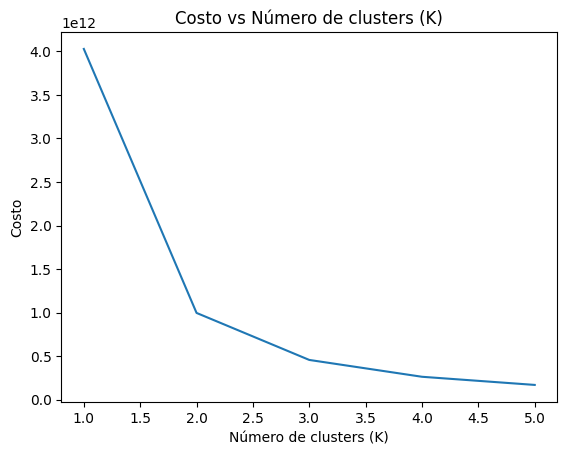

In [13]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame

# Definir las columnas categóricas
categorical_cols = ['State', 'Coverage', 'loc_type', 'Vehicle_Class']

# Obtener los índices de las columnas categóricas
categorical_cols_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Escoger el número óptimo de clusters
cost = []

for num_clusters in range(1, 6):
    print(num_clusters)
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=1)
    kproto.fit(df, categorical=categorical_cols_idx)  # Usar los índices en lugar de los nombres de las columnas
    cost.append(kproto.cost_)

plt.plot(range(1, 6), cost)
plt.xlabel('Número de clusters (K)')
plt.ylabel('Costo')
plt.title('Costo vs Número de clusters (K)')
plt.show()


In [14]:
import pandas as pd
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt

# Suponiendo que 'df' es tu DataFrame

# Definir las columnas categóricas
categorical_cols = ['State', 'Coverage', 'loc_type', 'Vehicle_Class']

# Obtener los índices de las columnas categóricas
categorical_cols_idx = [df.columns.get_loc(col) for col in categorical_cols]

# Escoger el número óptimo de clusters
cost = []

for num_clusters in range(1, 6):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao', n_init=1)
    kproto.fit(df, categorical=categorical_cols_idx)
    cost.append(kproto.cost_)

# Encontrar el número óptimo de clusters basado en el menor costo
optimal_num_clusters = cost.index(min(cost)) + 1

# Entrenar el modelo con el número óptimo de clusters
kproto_optimal = KPrototypes(n_clusters=optimal_num_clusters, init='Cao', n_init=1)
kproto_optimal.fit(df, categorical=categorical_cols_idx)

# Imprimir el número óptimo de clusters
print("Número óptimo de clusters:", optimal_num_clusters)


Número óptimo de clusters: 5


In [21]:
# Plotear los centroides
plt.figure(figsize=(10, 6))
for i, centroid in enumerate(centroids):
    # Para variables numéricas
    plt.scatter(centroid[0][:, 0], centroid[0][:, 1], marker='o', label=f'Cluster {i+1}')

    # Para variables categóricas
    plt.bar(range(len(centroid[1])), centroid[1], label=f'Cluster {i+1}')

# Añadir leyenda y título
plt.legend()
plt.title('Centroides de los Clusters')
plt.xlabel('Variable')
plt.ylabel('Valor de la Variable')
plt.show()


TypeError: string indices must be integers

<Figure size 1000x600 with 0 Axes>

In [22]:
# Obtener los clusters asignados a cada instancia del DataFrame original
clusters = kproto_optimal.predict(df, categorical=categorical_cols_idx)

# Agregar la columna de clusters al DataFrame original
df_with_clusters = df.copy()  # Para evitar modificar el DataFrame original
df_with_clusters['Cluster'] = clusters

# Ver los primeros registros del DataFrame con los clusters asignados
print(df_with_clusters.head())


        State Coverage  Income  loc_type  Total_Claim_Amount  Vehicle_Class  \
0  Washington    Basic   56274  Suburban          384.811147   Two-Door Car   
1      Nevada  Premium   48767  Suburban          566.472247   Two-Door Car   
2  Washington    Basic   43836     Rural          138.130879  Four-Door Car   
3      Oregon    Basic   62902     Rural          159.383042   Two-Door Car   
4      Oregon    Basic   55350  Suburban          321.600000  Four-Door Car   

   avg_vehicle_age  Cluster  
0        40.696695        0  
1        48.755298        0  
2        70.394474        3  
3        53.460212        0  
4        32.811507        0  


In [23]:
df.head()

,State,Coverage,Income,loc_type,Total_Claim_Amount,Vehicle_Class,avg_vehicle_age
0,Washington,Basic,56274,Suburban,384.811147,Two-Door Car,40.696695
1,Nevada,Premium,48767,Suburban,566.472247,Two-Door Car,48.755298
2,Washington,Basic,43836,Rural,138.130879,Four-Door Car,70.394474
3,Oregon,Basic,62902,Rural,159.383042,Two-Door Car,53.460212
4,Oregon,Basic,55350,Suburban,321.600000,Four-Door Car,32.811507


## Análisis

In [24]:
# Filtrar el DataFrame por el cluster 0
cluster_0_data = df_with_clusters[df_with_clusters['Cluster'] == 0]

# Mostrar las primeras 10 filas del cluster 0
print(cluster_0_data.head(10))


         State  Coverage  Income  loc_type  Total_Claim_Amount  Vehicle_Class  \
0   Washington     Basic   56274  Suburban          384.811147   Two-Door Car   
1       Nevada   Premium   48767  Suburban          566.472247   Two-Door Car   
3       Oregon     Basic   62902     Rural          159.383042   Two-Door Car   
4       Oregon     Basic   55350  Suburban          321.600000  Four-Door Car   
13      Oregon     Basic   51148     Urban          308.981664  Four-Door Car   
15      Oregon     Basic   57749  Suburban          355.200000   Two-Door Car   
25  Washington     Basic   54500  Suburban          302.400000   Two-Door Car   
30     Arizona     Basic   53243     Rural          157.397849  Four-Door Car   
31      Oregon     Basic   50071     Rural           18.918935   Two-Door Car   
32  California  Extended   60021  Suburban          882.871945  Four-Door Car   

    avg_vehicle_age  Cluster  
0         40.696695        0  
1         48.755298        0  
3         53.46

In [25]:
# Filtrar el DataFrame por el cluster 1
cluster_1_data = df_with_clusters[df_with_clusters['Cluster'] == 1]

# Mostrar las primeras 10 filas del cluster 1
print(cluster_1_data.head(10))


          State  Coverage  Income  loc_type  Total_Claim_Amount  \
8       Arizona     Basic   99845  Suburban          528.000000   
9    California     Basic   83689     Urban          307.139132   
19       Oregon     Basic   97541  Suburban          389.185006   
21      Arizona   Premium   86584  Suburban          532.800000   
34   Washington     Basic   92834  Suburban          292.800000   
53       Oregon     Basic   93011     Rural          281.451042   
93   California     Basic   92711  Suburban          368.400146   
96       Oregon     Basic   88768  Suburban          326.400000   
108      Oregon  Extended   97732     Urban          289.912200   
116  Washington     Basic   95697     Rural          178.006524   

     Vehicle_Class  avg_vehicle_age  Cluster  
8              SUV        58.986364        1  
9    Four-Door Car        35.166331        1  
19   Four-Door Car        59.736663        1  
21   Four-Door Car        52.875859        1  
34   Four-Door Car        4

In [26]:
# Filtrar el DataFrame por el cluster 2
cluster_2_data = df_with_clusters[df_with_clusters['Cluster'] == 2]

# Mostrar las primeras 10 filas del cluster 2
print(cluster_2_data.head(10))


         State  Coverage  Income  loc_type  Total_Claim_Amount  Vehicle_Class  \
7   California   Premium   77026     Urban          472.029737  Four-Door Car   
14  California   Premium   66140  Suburban          484.800000  Four-Door Car   
22      Oregon  Extended   75690  Suburban          384.000000  Four-Door Car   
24      Nevada  Extended   65999     Urban          615.927769     Luxury SUV   
27     Arizona     Basic   68987     Urban          204.475147  Four-Door Car   
29      Oregon  Extended   65706  Suburban          436.800000  Four-Door Car   
43  California     Basic   64749     Urban          302.565190  Four-Door Car   
48  California     Basic   66525     Rural          104.331355            SUV   
54      Oregon     Basic   65186     Rural            5.434505   Two-Door Car   
56      Oregon     Basic   75644  Suburban          467.803638   Two-Door Car   

    avg_vehicle_age  Cluster  
7         42.912717        2  
14        55.435488        2  
22        56.15

In [27]:
# Obtener un DataFrame para el cluster 0
df0 = df_with_clusters[df_with_clusters['Cluster'] == 0]

# Obtener un DataFrame para el cluster 1
df1 = df_with_clusters[df_with_clusters['Cluster'] == 1]

# Obtener un DataFrame para el cluster 2
df2 = df_with_clusters[df_with_clusters['Cluster'] == 2]


In [28]:
df0.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,1345.000000,1345.000000,1345.000000,1345.0
mean,56200.939777,375.842495,49.997316,0.0
std,4870.123353,271.639872,9.838048,0.0
min,47406.000000,0.769185,19.720816,0.0
25%,51972.000000,186.191931,43.381643,0.0
50%,56398.000000,331.200000,49.822733,0.0
75%,60420.000000,504.000000,56.878925,0.0
max,64478.000000,2552.343856,81.367792,0.0


In [29]:
df1.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,939.000000,939.000000,939.000000,939.0
mean,90512.720980,304.741769,50.292244,1.0
std,5315.828328,218.184336,9.698911,0.0
min,81676.000000,0.099007,23.987276,1.0
25%,85883.500000,143.089786,43.651191,1.0
50%,90213.000000,298.362415,50.306221,1.0
75%,95139.500000,414.718750,56.844581,1.0
max,99981.000000,2452.894264,79.323069,1.0


In [30]:
df2.describe()

,Income,Total_Claim_Amount,avg_vehicle_age,Cluster
count,1166.000000,1166.000000,1166.000000,1166.0
mean,72774.018868,313.458005,49.664717,2.0
std,4752.642263,217.120569,10.029193,0.0
min,64495.000000,2.823303,13.657003,2.0
25%,68778.750000,147.602036,43.029209,2.0
50%,72640.500000,296.015240,49.456940,2.0
75%,76698.500000,425.893127,56.587926,2.0
max,81639.000000,1404.000000,79.899614,2.0


In [31]:
# Seleccionar las columnas relevantes y describir el DataFrame df0
df0_description = df0[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

# Mostrar la descripción
print(df0_description)


             State  loc_type Coverage  Vehicle_Class
count         1345      1345     1345           1345
unique           5         3        3              6
top     California  Suburban    Basic  Four-Door Car
freq           429       631      789            672


In [33]:
# Seleccionar las columnas relevantes y describir el DataFrame df1
df1_description = df1[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

# Mostrar la descripción
print(df1_description)


             State loc_type Coverage  Vehicle_Class
count          939      939      939            939
unique           5        3        3              6
top     California    Rural    Basic  Four-Door Car
freq           323      339      594            477


In [34]:
# Seleccionar las columnas relevantes y describir el DataFrame df2
df2_description = df2[['State', 'loc_type', 'Coverage', 'Vehicle_Class']].describe()

# Mostrar la descripción
print(df2_description)


             State  loc_type Coverage  Vehicle_Class
count         1166      1166     1166           1166
unique           5         3        3              6
top     California  Suburban    Basic  Four-Door Car
freq           413       416      739            591


# Ahora vamos a ver donde está la diferencia entre clusters analizando las categóricas

## Cluster 0

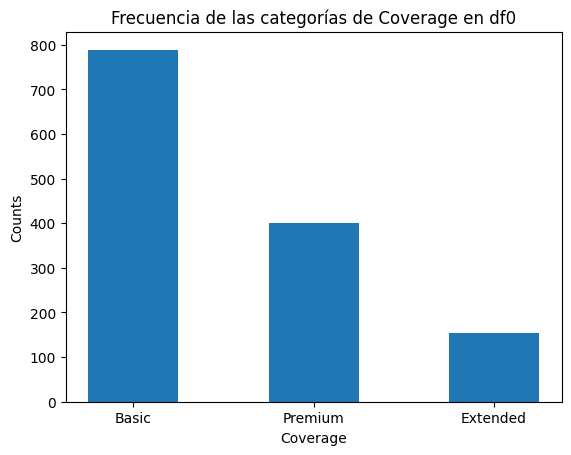

In [35]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia
categories = df0['Coverage'].unique()
counts = df0['Coverage'].value_counts()

# Crear el gráfico de barras
plt.bar(categories, counts, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Coverage')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Coverage en df0')

# Mostrar el gráfico
plt.show()


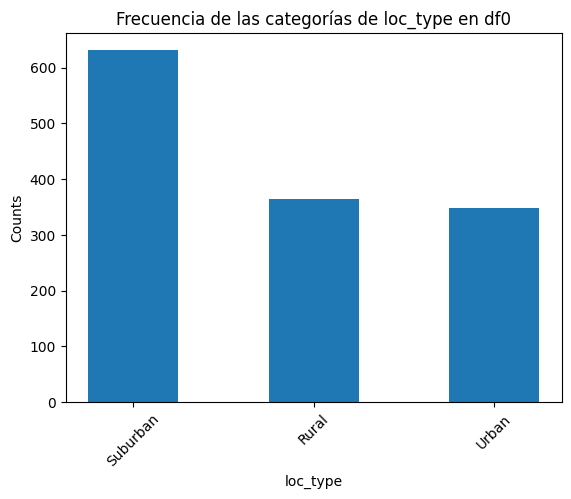

In [36]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia
categories = df0['loc_type'].unique()
counts = df0['loc_type'].value_counts()

# Crear el gráfico de barras
plt.bar(categories, counts, width=0.5)

# Añadir etiquetas y título
plt.xlabel('loc_type')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de loc_type en df0')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


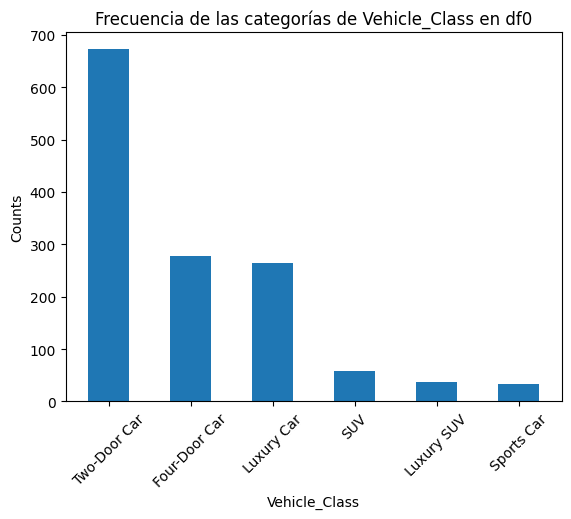

In [37]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia
categories = df0['Vehicle_Class'].unique()
counts = df0['Vehicle_Class'].value_counts()

# Crear el gráfico de barras
plt.bar(categories, counts, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Vehicle_Class')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Vehicle_Class en df0')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


## Cluster 1

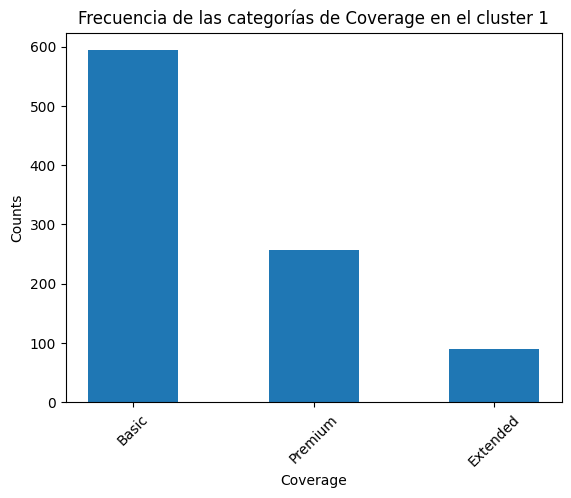

In [38]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 1
categories_cluster_1 = df1['Coverage'].unique()
counts_cluster_1 = df1['Coverage'].value_counts()

# Crear el gráfico de barras para el cluster 1
plt.bar(categories_cluster_1, counts_cluster_1, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Coverage')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Coverage en el cluster 1')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


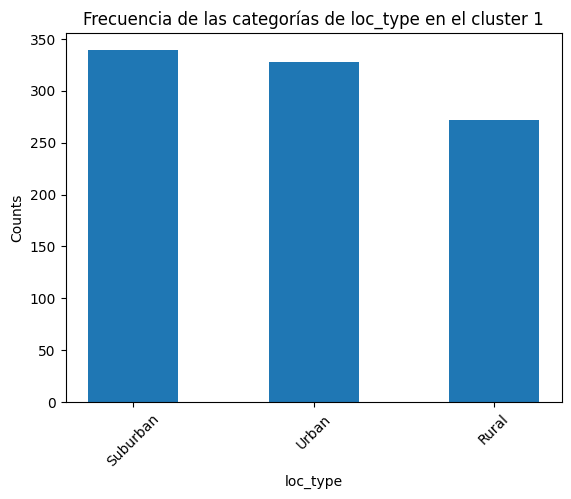

In [39]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 1
categories_cluster_1 = df1['loc_type'].unique()
counts_cluster_1 = df1['loc_type'].value_counts()

# Crear el gráfico de barras para el cluster 1
plt.bar(categories_cluster_1, counts_cluster_1, width=0.5)

# Añadir etiquetas y título
plt.xlabel('loc_type')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de loc_type en el cluster 1')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


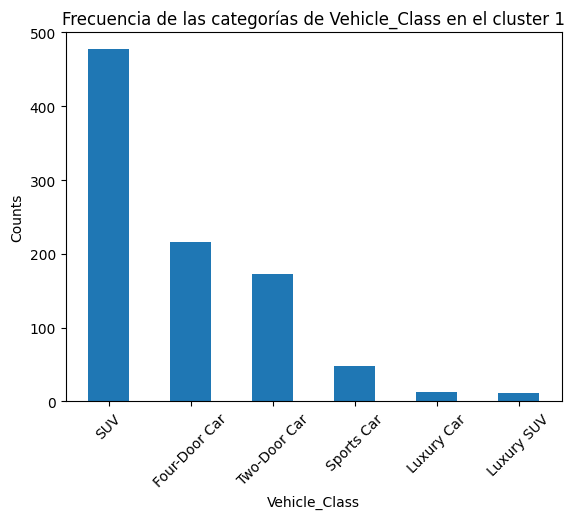

In [40]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 1
categories_cluster_1 = df1['Vehicle_Class'].unique()
counts_cluster_1 = df1['Vehicle_Class'].value_counts()

# Crear el gráfico de barras para el cluster 1
plt.bar(categories_cluster_1, counts_cluster_1, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Vehicle_Class')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Vehicle_Class en el cluster 1')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


## Cluster 2

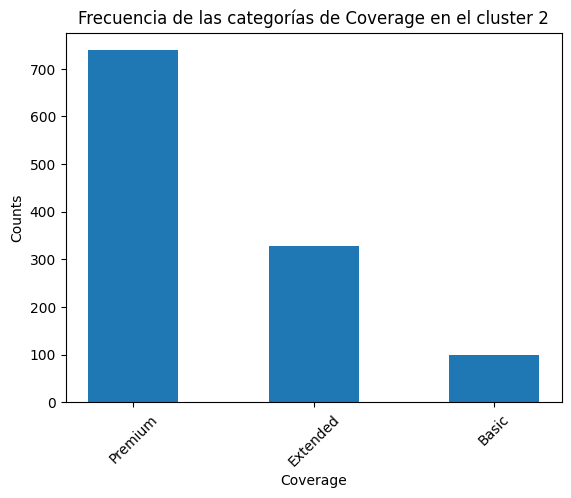

In [41]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 2
categories_cluster_2 = df2['Coverage'].unique()
counts_cluster_2 = df2['Coverage'].value_counts()

# Crear el gráfico de barras para el cluster 2
plt.bar(categories_cluster_2, counts_cluster_2, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Coverage')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Coverage en el cluster 2')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


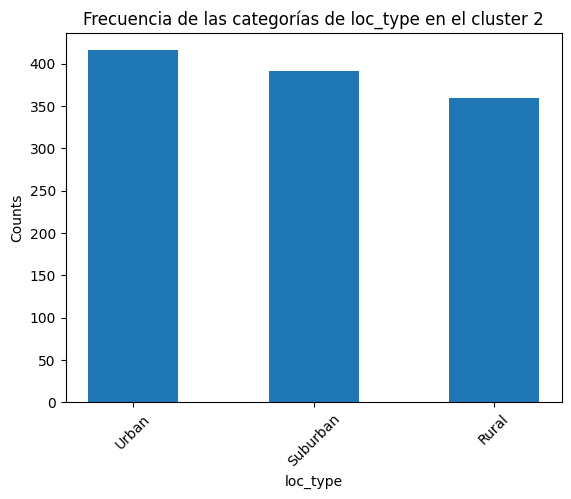

In [42]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 2
categories_cluster_2 = df2['loc_type'].unique()
counts_cluster_2 = df2['loc_type'].value_counts()

# Crear el gráfico de barras para el cluster 2
plt.bar(categories_cluster_2, counts_cluster_2, width=0.5)

# Añadir etiquetas y título
plt.xlabel('loc_type')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de loc_type en el cluster 2')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


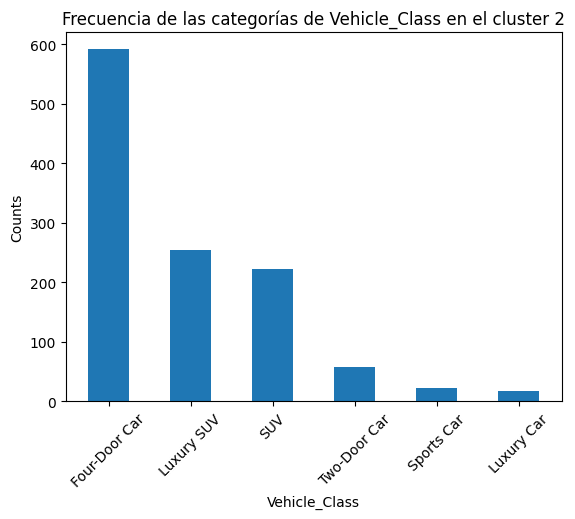

In [43]:
import matplotlib.pyplot as plt

# Obtener las categorías únicas y contar su frecuencia en el cluster 2
categories_cluster_2 = df2['Vehicle_Class'].unique()
counts_cluster_2 = df2['Vehicle_Class'].value_counts()

# Crear el gráfico de barras para el cluster 2
plt.bar(categories_cluster_2, counts_cluster_2, width=0.5)

# Añadir etiquetas y título
plt.xlabel('Vehicle_Class')
plt.ylabel('Counts')
plt.title('Frecuencia de las categorías de Vehicle_Class en el cluster 2')

# Rotar etiquetas del eje x para mejor visualización si es necesario
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


# Plotear 3D

ValueError: could not convert string to float: 'Two-Door Car'

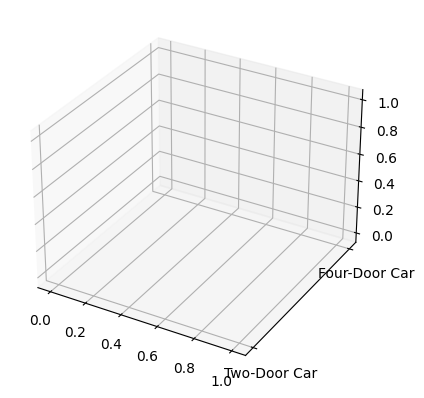

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Seleccionar las variables para el gráfico 3D
x = df['Income']
y = df['Vehicle_Class']
z = df['Total_Claim_Amount']

# Crear la figura y el eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotear los datos
ax.scatter(x, y, z)

# Añadir etiquetas y título
ax.set_xlabel('Income')
ax.set_ylabel('Vehicle_Class')
ax.set_zlabel('Total_Claim_Amount')
plt.title('Gráfico 3D de Income, Vehicle_Class y Total_Claim_Amount')

# Mostrar el gráfico
plt.show()


In [ ]:
# Probar otras representaciones 3D

# Repetimos el proceso tratando income como una categorical, ¿mejor clustering?

In [46]:
# Crear una lista de índices de columnas categóricas
categorical_cols = [1, 3, 5]  # Índices de las columnas categóricas sin 'Income'

# Volvemos a ajustar el modelo KPrototypes
kproto_income_categorical = KPrototypes(n_clusters=3, init='Cao')
clusters_income_categorical = kproto_income_categorical.fit_predict(df.iloc[:, :-1], categorical=categorical_cols)

# Concatenar los clusters al DataFrame original
df_with_clusters_income_categorical = df.copy()
df_with_clusters_income_categorical['Cluster'] = clusters_income_categorical

# Describir los clusters con la nueva configuración
for cluster in range(3):
    print(f"Cluster {cluster}:")
    print(df_with_clusters_income_categorical[df_with_clusters_income_categorical['Cluster'] == cluster].describe())
    print("\n")


ValueError: could not convert string to float: 'Washington'